In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import matplotlib as mpl

In [4]:
def calculate_entropy(row):
    row_filt = row.dropna().values
    if row_filt.sum() == 0:
        return np.nan
    probabilities = row_filt / row_filt.sum()
    entropy_value = entropy(probabilities)
    return entropy_value

In [5]:
count_table = pd.read_csv('count_table.txt', sep=',').drop_duplicates()
count_table[['ID', 'TAG']] = count_table.name.str.split('_', expand=True)
count_table.head()
#barcode_filetag = count_table.groupby(['ID', 'name'], as_index=False).sum(numeric_only=True).set_index('name').groupby('ID', as_index=False).idxmax()['count'].to_list()

,name,whitelist,count,ID,TAG
0,SRR19752930_1,arc,0,SRR19752930,1
1,SRR19752930_1,v1,0,SRR19752930,1
2,SRR19752930_1,v2,0,SRR19752930,1
3,SRR19752930_1,v3,0,SRR19752930,1
4,SRR19752930_2,arc,219,SRR19752930,2


In [6]:
pivot_table = pd.pivot_table(count_table, values='count', index='ID', columns='TAG', aggfunc='sum')
pivot_table['entropy'] = pivot_table.apply(calculate_entropy, axis=1)
pivot_table['max_count'] = pivot_table.iloc[:, :4].max(axis=1)
pivot_table['max_tag'] = pivot_table.iloc[:, :4].idxmax(axis=1)
pivot_table['max_sample_tag'] = pivot_table.index + '_' + pivot_table.max_tag
pivot_table.head()

TAG,1,2,3,4,entropy,max_count,max_tag,max_sample_tag
ID,,,,,,,,
SRR10011559,208304.0,930.0,0.0,NaN,0.028508,208304.0,1,SRR10011559_1
SRR10011560,207970.0,916.0,0.0,NaN,0.028185,207970.0,1,SRR10011560_1
SRR10011561,207721.0,943.0,0.0,NaN,0.028910,207721.0,1,SRR10011561_1
SRR10011562,208154.0,936.0,0.0,NaN,0.028680,208154.0,1,SRR10011562_1
SRR10011563,212330.0,911.0,0.0,NaN,0.027570,212330.0,1,SRR10011563_1


<Axes: xlabel='entropy', ylabel='Count'>

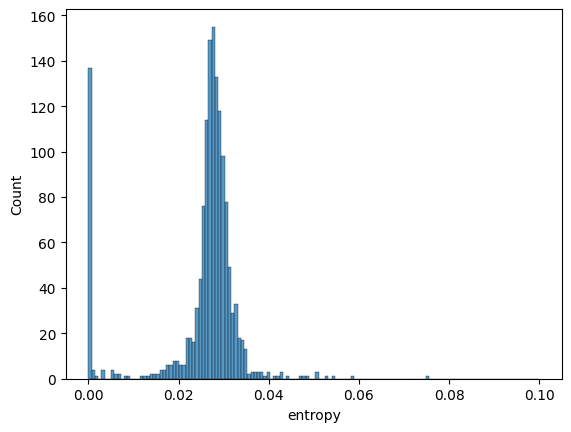

In [7]:
sns.histplot(pivot_table.entropy.dropna(), binrange=[0, 0.1])

<Axes: xlabel='max_count', ylabel='Count'>

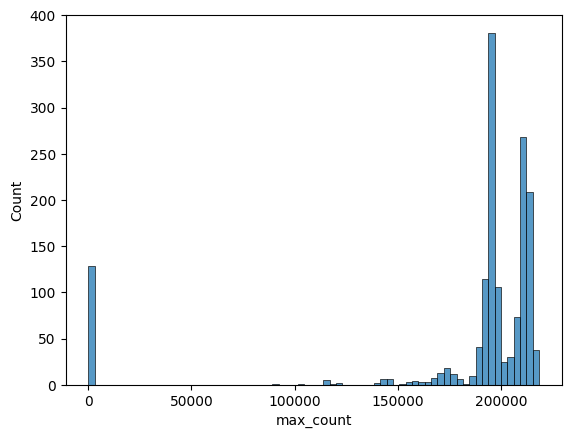

In [8]:
sns.histplot(pivot_table.max_count)

In [9]:
pivot_table[pivot_table.max_count < 100000].sort_values('max_count', ascending=False).head(7)

TAG,1,2,3,4,entropy,max_count,max_tag,max_sample_tag
ID,,,,,,,,
SRR12400259,90231.0,768.0,0.0,NaN,0.048702,90231.0,1,SRR12400259_1
SRR10677406,NaN,1251.0,NaN,NaN,0.000000,1251.0,2,SRR10677406_2
SRR10677409,NaN,1211.0,NaN,NaN,0.000000,1211.0,2,SRR10677409_2
SRR6976743,NaN,1197.0,NaN,NaN,0.000000,1197.0,2,SRR6976743_2
SRR10677412,NaN,1197.0,NaN,NaN,0.000000,1197.0,2,SRR10677412_2
SRR10677404,NaN,1156.0,NaN,NaN,0.000000,1156.0,2,SRR10677404_2
SRR6976740,NaN,1107.0,NaN,NaN,0.000000,1107.0,2,SRR6976740_2


In [10]:
def n2larg(row):
    nlarg = row.nlargest(2).to_list()
    return pd.Series(nlarg)

In [11]:
max_sample_count_table = count_table.set_index('name').loc[pivot_table.max_sample_tag.unique()].reset_index()
max_sample_count_table = max_sample_count_table.pivot(index='name', columns='whitelist', values='count')
max_sample_count_table['entropy'] = max_sample_count_table.apply(calculate_entropy, axis=1)
max_sample_count_table[['max_count', 'secmax_count']] = max_sample_count_table.iloc[:, :4].apply(n2larg, axis=1)
max_sample_count_table['max_col'] = max_sample_count_table.iloc[:, :4].idxmax(axis=1)
max_sample_count_table.head()

whitelist,arc,v1,v2,v3,entropy,max_count,secmax_count,max_col
name,,,,,,,,
SRR10011559_1,345,567,188137,19255,0.338766,188137,19255,v2
SRR10011560_1,346,514,188119,18991,0.334784,188119,18991,v2
SRR10011561_1,304,535,187817,19065,0.335189,187817,19065,v2
SRR10011562_1,291,581,187849,19433,0.339614,187849,19433,v2
SRR10011563_1,365,541,191268,20156,0.343785,191268,20156,v2


In [12]:
max_sample_count_table.sort_values('entropy', ascending=False)

whitelist,arc,v1,v2,v3,entropy,max_count,secmax_count,max_col
name,,,,,,,,
SRR10269924_2,80,460,174,325,1.220947,460,325,v1
SRR10269922_2,84,529,120,319,1.156988,529,319,v1
SRR11908797_2,110,446,44,256,1.116914,446,256,v1
SRR11908799_1,149,538,33,270,1.084155,538,270,v1
SRR13387395_2,66,463,50,360,1.058997,463,360,v1
...,...,...,...,...,...,...,...,...
SRR18604258_1,0,0,0,0,NaN,0,0,arc
SRR18604261_1,0,0,0,0,NaN,0,0,arc
SRR18604264_1,0,0,0,0,NaN,0,0,arc


<Axes: xlabel='entropy', ylabel='Count'>

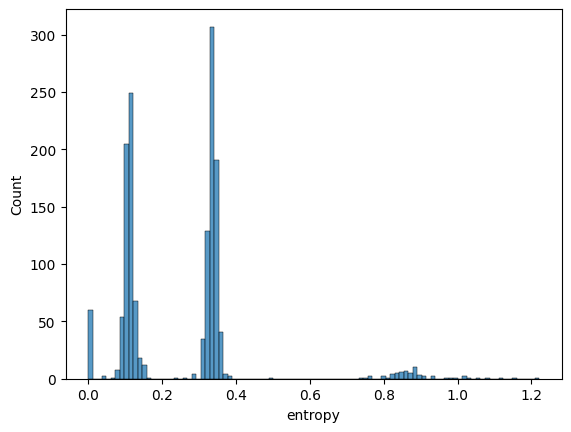

In [13]:
sns.histplot(max_sample_count_table.entropy.dropna(), bins=100)

<Axes: xlabel='max_count', ylabel='Count'>

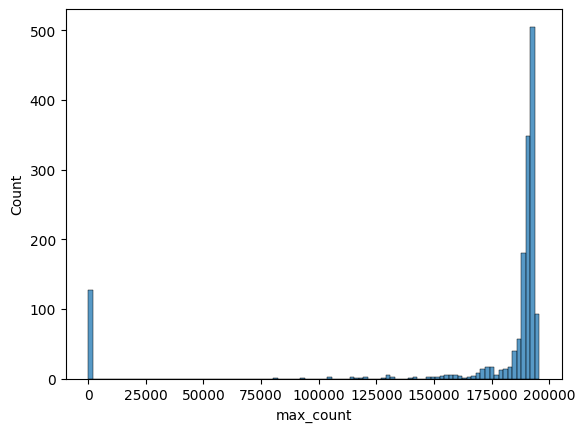

In [14]:
sns.histplot(max_sample_count_table.max_count.dropna(), bins=100)

<Axes: xlabel='secmax_count', ylabel='Count'>

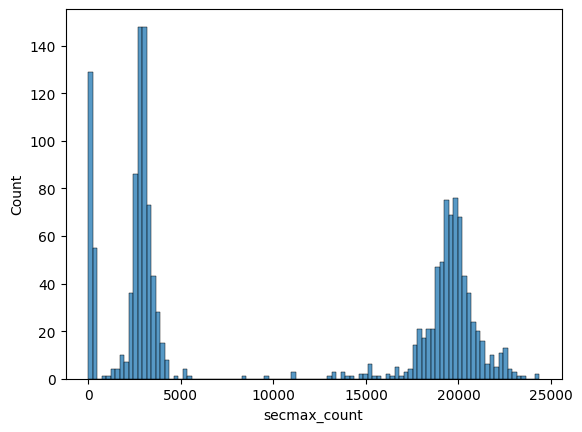

In [15]:
sns.histplot(max_sample_count_table.secmax_count.dropna(), bins=100)

In [16]:
max_sample_count_table.sort_values('secmax_count', ascending=False)

whitelist,arc,v1,v2,v3,entropy,max_count,secmax_count,max_col
name,,,,,,,,
SRR12455252_1,394,741,192436,24357,0.385513,192436,24357,v2
SRR12455251_1,359,722,191660,24258,0.384194,191660,24258,v2
SRR13563880_1,191,406,194463,23453,0.361153,194463,23453,v2
SRR13563881_1,197,364,194392,23265,0.358651,194392,23265,v2
SRR11581697_2,21,166,190288,23089,0.349799,190288,23089,v2
...,...,...,...,...,...,...,...,...
SRR8034298_3,0,175102,0,0,0.000000,175102,0,v1
SRR10027173_1,0,0,0,0,NaN,0,0,arc
SRR8034299_3,0,171494,0,0,0.000000,171494,0,v1


In [17]:
max_sample_count_table[max_sample_count_table.max_count < 100000].sort_values('max_count', ascending=False)

whitelist,arc,v1,v2,v3,entropy,max_count,secmax_count,max_col
name,,,,,,,,
SRR12400257_1,107,468,92197,9742,0.350826,92197,9742,v2
SRR12400259_1,106,431,81172,8522,0.351500,81172,8522,v2
SRR10677406_2,31,921,28,271,0.733475,921,271,v1
SRR12282461_1,5,896,3,182,0.499072,896,182,v1
SRR10677409_2,23,855,33,300,0.764910,855,300,v1
...,...,...,...,...,...,...,...,...
SRR18604258_1,0,0,0,0,NaN,0,0,arc
SRR18604264_1,0,0,0,0,NaN,0,0,arc
SRR18604261_1,0,0,0,0,NaN,0,0,arc


In [18]:
size = 4
entropy(np.ones(size) / size)

np.float64(1.3862943611198906)

In [19]:
max_sample_count_table.iloc[:, :4].sum(axis=1).values

array([208304, 207970, 207721, ..., 195706, 195278, 195767])

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(max_sample_count_table.iloc[:, :4].div(max_sample_count_table.iloc[:, :4].sum(axis=1), axis=0).fillna(0))
max_sample_count_table[['PC1', 'PC2']] = pca_components
max_sample_count_table.head()

whitelist,arc,v1,v2,v3,entropy,max_count,secmax_count,max_col,PC1,PC2
name,,,,,,,,,,
SRR10011559_1,345,567,188137,19255,0.338766,188137,19255,v2,0.588805,-0.083992
SRR10011560_1,346,514,188119,18991,0.334784,188119,18991,v2,0.590568,-0.084258
SRR10011561_1,304,535,187817,19065,0.335189,187817,19065,v2,0.589977,-0.084240
SRR10011562_1,291,581,187849,19433,0.339614,187849,19433,v2,0.587636,-0.084056
SRR10011563_1,365,541,191268,20156,0.343785,191268,20156,v2,0.585366,-0.084240


In [21]:
max_sample_count_table.arc.nlargest(2).tolist()

[903, 880]

In [22]:
def nlarg_ratio(row):
    nlarg = row.nlargest(2).to_list()
    if nlarg[1] != 0:
        return np.log2(nlarg[0] / nlarg[1])
    return np.nan

In [23]:
max_sample_count_table['nlarg_ratio'] = max_sample_count_table.iloc[:, :4].apply(nlarg_ratio, axis=1)
max_sample_count_table.head()

whitelist,arc,v1,v2,v3,entropy,max_count,secmax_count,max_col,PC1,PC2,nlarg_ratio
name,,,,,,,,,,,
SRR10011559_1,345,567,188137,19255,0.338766,188137,19255,v2,0.588805,-0.083992,3.288479
SRR10011560_1,346,514,188119,18991,0.334784,188119,18991,v2,0.590568,-0.084258,3.308258
SRR10011561_1,304,535,187817,19065,0.335189,187817,19065,v2,0.589977,-0.084240,3.300329
SRR10011562_1,291,581,187849,19433,0.339614,187849,19433,v2,0.587636,-0.084056,3.272993
SRR10011563_1,365,541,191268,20156,0.343785,191268,20156,v2,0.585366,-0.084240,3.246314


<Axes: xlabel='nlarg_ratio', ylabel='Count'>

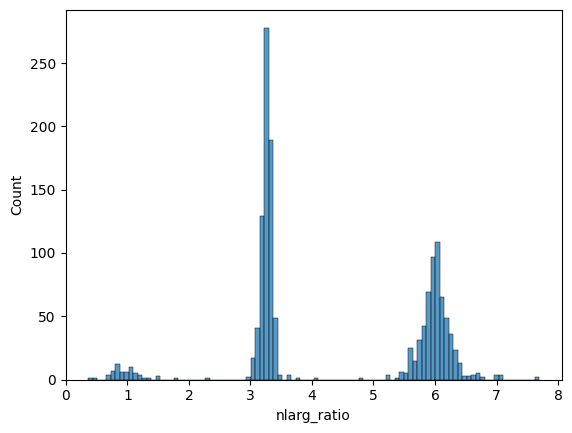

In [24]:
sns.histplot(max_sample_count_table['nlarg_ratio'], bins=100)

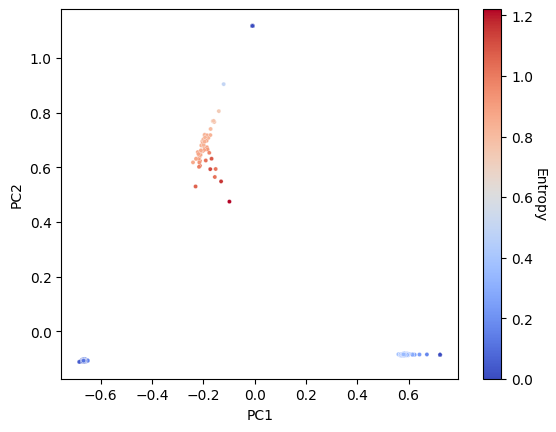

In [25]:
plt.scatter(
    x=max_sample_count_table['PC1'],
    y=max_sample_count_table['PC2'],
    c=max_sample_count_table['entropy'],
    marker='.', cmap='coolwarm',
    linewidths=0.2,
    edgecolors='white'
)
plt.xlabel('PC1')
plt.ylabel('PC2')

cbar = plt.colorbar()
cbar.set_label(label='Entropy', rotation=270, loc='center', labelpad=10)

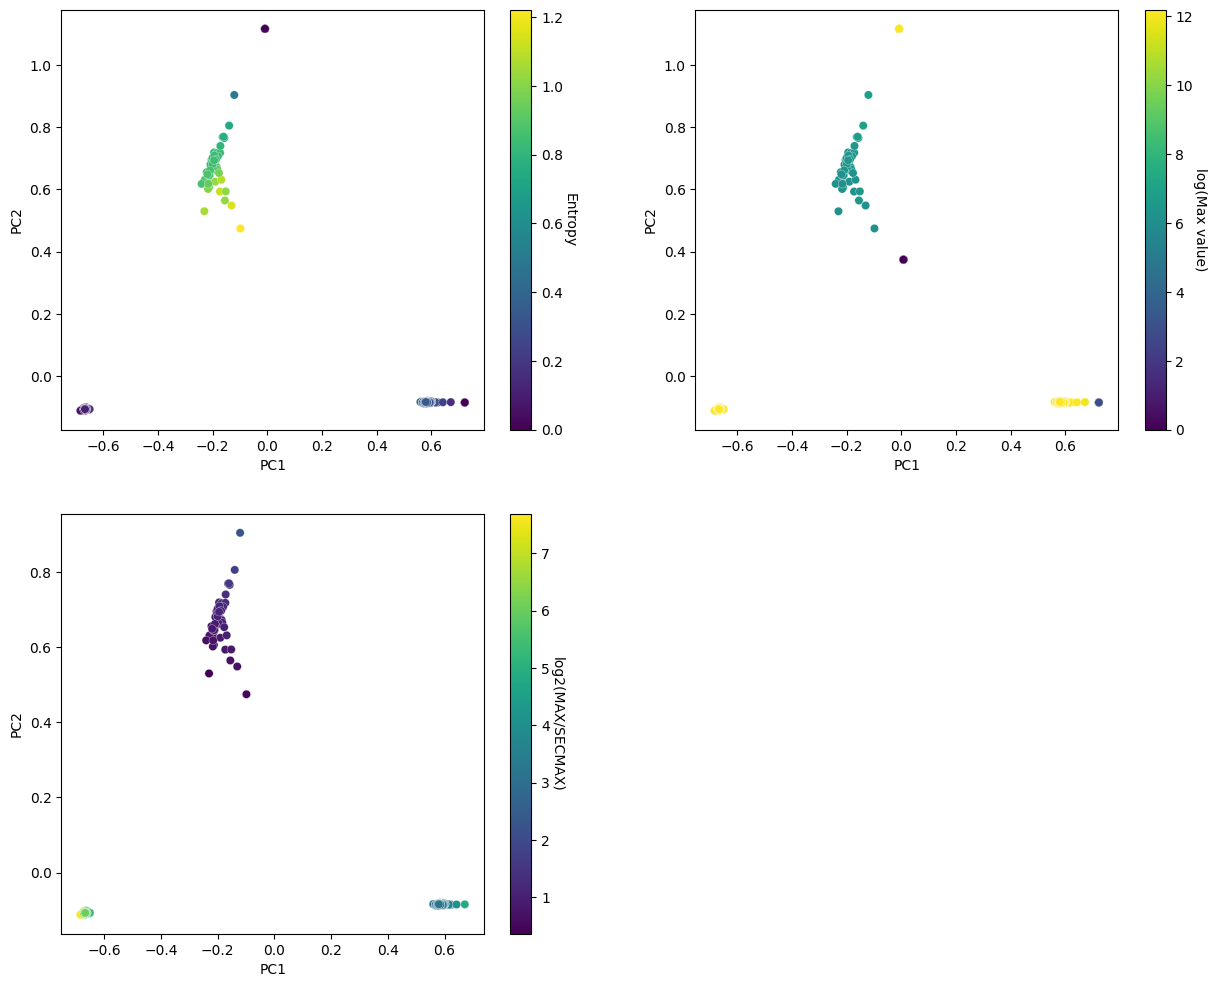

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(vmin=0, vmax=100)

im = axes[0, 0].scatter(
    x=max_sample_count_table['PC1'],
    y=max_sample_count_table['PC2'],
    c=max_sample_count_table['entropy'],
    marker='o',
    cmap=cmap,
    linewidths=0.2,
    edgecolors='white'
)
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')

cbar = plt.colorbar(im, ax=axes[0, 0])
cbar.set_label(label='Entropy', rotation=270, loc='center', labelpad=10)

im = axes[0, 1].scatter(
    x=max_sample_count_table['PC1'],
    y=max_sample_count_table['PC2'],
    c=np.log1p(max_sample_count_table['max_count']),
    marker='o',
    cmap=cmap,
    linewidths=0.2,
    edgecolors='white'
)

axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')

cbar = plt.colorbar(im, ax=axes[0, 1])
cbar.set_label(label='log(Max value)', rotation=270, loc='center', labelpad=10)

im = axes[1, 0].scatter(
    x=max_sample_count_table['PC1'],
    y=max_sample_count_table['PC2'],
    c=max_sample_count_table['nlarg_ratio'],
    marker='o',
    cmap=cmap,
    linewidths=0.2,
    edgecolors='white'
)

axes[1, 0].set_xlabel('PC1')
axes[1, 0].set_ylabel('PC2')

cbar = plt.colorbar(im, ax=axes[1, 0])
cbar.set_label(label='log2(MAX/SECMAX)', rotation=270, loc='center', labelpad=10)

axes[1, 1].remove()

In [27]:
max_sample_count_table.sort_values('PC1', ascending=False)

whitelist,arc,v1,v2,v3,entropy,max_count,secmax_count,max_col,PC1,PC2,nlarg_ratio
name,,,,,,,,,,,
SRR12616291_2,0,0,16,0,0.000000,16,0,v2,0.722681,-0.085489,NaN
SRR12616294_2,0,0,16,0,0.000000,16,0,v2,0.722681,-0.085489,NaN
SRR12616297_2,0,0,17,0,0.000000,17,0,v2,0.722681,-0.085489,NaN
SRR12616307_2,0,0,16,0,0.000000,16,0,v2,0.722681,-0.085489,NaN
SRR8318956_2,64,255,152386,5563,0.167671,152386,5563,v2,0.671515,-0.084333,4.775723
...,...,...,...,...,...,...,...,...,...,...,...
SRR13377349_2,287,566,1411,190382,0.074519,190382,1411,v3,-0.677856,-0.108573,7.076035
SRR13377348_2,300,542,1390,189563,0.073968,189563,1390,v3,-0.677989,-0.108676,7.091449
SRR13377350_2,280,542,1383,189691,0.073080,189691,1383,v3,-0.678121,-0.108731,7.099706


In [28]:
max_sample_count_table.sort_values('PC2', ascending=False)

whitelist,arc,v1,v2,v3,entropy,max_count,secmax_count,max_col,PC1,PC2,nlarg_ratio
name,,,,,,,,,,,
SRR8034299_3,0,171494,0,0,0.000000,171494,0,v1,-0.008386,1.116623,NaN
SRR8034292_3,0,175960,0,0,0.000000,175960,0,v1,-0.008386,1.116623,NaN
SRR8034297_3,0,173268,0,0,0.000000,173268,0,v1,-0.008386,1.116623,NaN
SRR8034298_3,0,175102,0,0,0.000000,175102,0,v1,-0.008386,1.116623,NaN
SRR11007856_3,0,179146,0,0,0.000000,179146,0,v1,-0.008386,1.116623,NaN
...,...,...,...,...,...,...,...,...,...,...,...
SRR12455256_1,184,254,3565,192423,0.108065,192423,3565,v3,-0.664059,-0.110572,5.754235
SRR12837065_2,80,249,3226,193444,0.096824,193444,3226,v3,-0.666957,-0.110922,5.906026
SRR12837066_2,391,57,2055,193580,0.075220,193580,2055,v3,-0.674849,-0.111490,6.557648


Let's estimate the error probability

In [29]:
estim_df = max_sample_count_table[max_sample_count_table.max_count > 80000]
p = (estim_df.max_count / 200000).sum() / estim_df.shape[0]
print(f'p = {p:.4f} +- {np.sqrt(p * (1 - p) / estim_df.shape[0]):.4f}')

p = 0.9399 +- 0.0064


In [35]:
estim_df[estim_df.max_count < 120000]

whitelist,arc,v1,v2,v3,entropy,max_count,secmax_count,max_col,PC1,PC2,nlarg_ratio
name,,,,,,,,,,,
SRR11007864_3,0,114479,0,0,0.000000,114479,0,v1,-0.008386,1.116623,NaN
SRR11007872_3,0,115635,0,0,0.000000,115635,0,v1,-0.008386,1.116623,NaN
SRR11007879_3,0,119212,0,0,0.000000,119212,0,v1,-0.008386,1.116623,NaN
SRR11007880_3,0,114057,0,0,0.000000,114057,0,v1,-0.008386,1.116623,NaN
SRR12400257_1,107,468,92197,9742,0.350826,92197,9742,v2,0.584228,-0.082136,3.242430
SRR12400258_1,126,509,104880,11131,0.350888,104880,11131,v2,0.583792,-0.082372,3.236084
SRR12400259_1,106,431,81172,8522,0.351500,81172,8522,v2,0.584806,-0.081804,3.251718
SRR12400260_1,122,471,103821,11069,0.350149,103821,11069,v2,0.583418,-0.082738,3.229501


In [40]:
a = [1, 2, 3, 4, 5]

In [41]:
'SRR19752930_1.fastq.arc.count'.split('.', 1)

['SRR19752930_1', 'fastq.arc.count']

In [42]:
path_to_list = lambda path: path.rstrip().split('/')
base_to_name = lambda basename: basename.split('.', 1)[0]

with open('count_files.txt', 'r') as file:
    lines = map(path_to_list, file.readlines())
    name_to_dataset = {base_to_name(line[-1]):line[-3] for line in lines}

<Axes: xlabel='max_count', ylabel='Probability'>

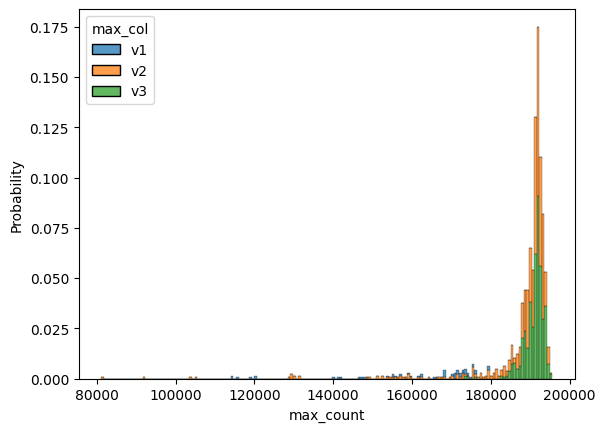

In [30]:
sns.histplot(estim_df, x='max_count', stat='probability', hue='max_col', multiple='stack', hue_order=['v1', 'v2', 'v3'])

In [31]:
freq = estim_df.groupby('max_col').agg({'max_count': ['sum', 'count']})['max_count']
freq['probability_estimate'] = freq['sum'] /  freq['count'] / 200000
freq['std'] = np.sqrt(freq['probability_estimate'] * (1 - freq['probability_estimate']) / freq['count'])
freq

,sum,count,probability_estimate,std
max_col,,,,
v1,9021528,56,0.805494,0.052894
v2,134257553,716,0.937553,0.009043
v3,117815338,617,0.954743,0.008368


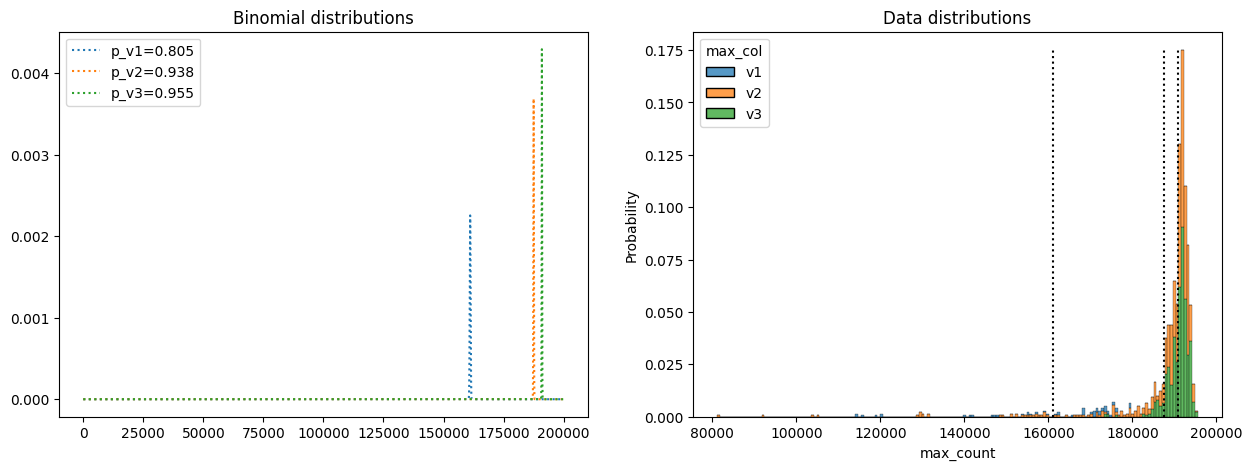

In [32]:
from scipy.stats import binom
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
x = np.arange(0, 200001)
n = 200000
colors = ['green', 'orange', 'b']
hue_order = ['v1', 'v2', 'v3']

probability_list = freq['probability_estimate'].to_list()
for label, proba in zip(hue_order, probability_list):
    # plot Binomial dist
    axes[0].plot(x, binom.pmf(x, n, proba), linestyle=':', label=f'p_{label}={proba:.3f}')
    axes[0].legend()
    axes[0].set_title('Binomial distributions')
    
    

sns.histplot(estim_df, x='max_count', stat='probability', hue='max_col', multiple='stack', ax=axes[1], hue_order=hue_order)

for label, proba in zip(hue_order, probability_list):
    # plot expected values
    axes[1].vlines(x=proba * 200000, ymin=0, ymax=0.175, linestyles='dotted', colors='black')

axes[1].set_title('Data distributions')
plt.show()

In [33]:
estim_df.sort_values(by='max_count', ascending=True)

whitelist,arc,v1,v2,v3,entropy,max_count,secmax_count,max_col,PC1,PC2,nlarg_ratio
name,,,,,,,,,,,
SRR12400259_1,106,431,81172,8522,0.351500,81172,8522,v2,0.584806,-0.081804,3.251718
SRR12400257_1,107,468,92197,9742,0.350826,92197,9742,v2,0.584228,-0.082136,3.242430
SRR12400260_1,122,471,103821,11069,0.350149,103821,11069,v2,0.583418,-0.082738,3.229501
SRR12400258_1,126,509,104880,11131,0.350888,104880,11131,v2,0.583792,-0.082372,3.236084
SRR11007880_3,0,114057,0,0,0.000000,114057,0,v1,-0.008386,1.116623,NaN
...,...,...,...,...,...,...,...,...,...,...,...
SRR13532408_2,202,693,2986,194851,0.109150,194851,2986,v3,-0.666923,-0.107921,6.028013
SRR6976739_1,522,685,194933,20185,0.347909,194933,20185,v2,0.586706,-0.083125,3.271623
SRR13532410_2,215,665,3016,195193,0.109270,195193,3016,v3,-0.666804,-0.108066,6.016121


In [62]:
estim_df['dataset'] = list(map(lambda x: name_to_dataset[x], estim_df.index.tolist()))
estim_df.sort_values('max_count', ascending=True).head(10)

/lustre/scratch126/cellgen/cellgeni/tmp/ipykernel_3630947/3222900031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estim_df['dataset'] = list(map(lambda x: name_to_dataset[x], estim_df.index.tolist()))


whitelist,arc,v1,v2,v3,entropy,max_count,secmax_count,max_col,PC1,PC2,nlarg_ratio,dataset
name,,,,,,,,,,,,
SRR12400259_1,106,431,81172,8522,0.351500,81172,8522,v2,0.584806,-0.081804,3.251718,GSE155794
SRR12400257_1,107,468,92197,9742,0.350826,92197,9742,v2,0.584228,-0.082136,3.242430,GSE155794
SRR12400260_1,122,471,103821,11069,0.350149,103821,11069,v2,0.583418,-0.082738,3.229501,GSE155794
SRR12400258_1,126,509,104880,11131,0.350888,104880,11131,v2,0.583792,-0.082372,3.236084,GSE155794
SRR11007880_3,0,114057,0,0,0.000000,114057,0,v1,-0.008386,1.116623,NaN,GSE144707
SRR11007864_3,0,114479,0,0,0.000000,114479,0,v1,-0.008386,1.116623,NaN,GSE144707
SRR11007872_3,0,115635,0,0,0.000000,115635,0,v1,-0.008386,1.116623,NaN,GSE144707
SRR11007879_3,0,119212,0,0,0.000000,119212,0,v1,-0.008386,1.116623,NaN,GSE144707
SRR11007863_3,0,120140,0,0,0.000000,120140,0,v1,-0.008386,1.116623,NaN,GSE144707


/lustre/scratch127/cellgen/cellgeni/aljes/reprocess/venv/lib/python3.10/site-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


/lustre/scratch127/cellgen/cellgeni/aljes/reprocess/venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/lustre/scratch127/cellgen/cellgeni/aljes/reprocess/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


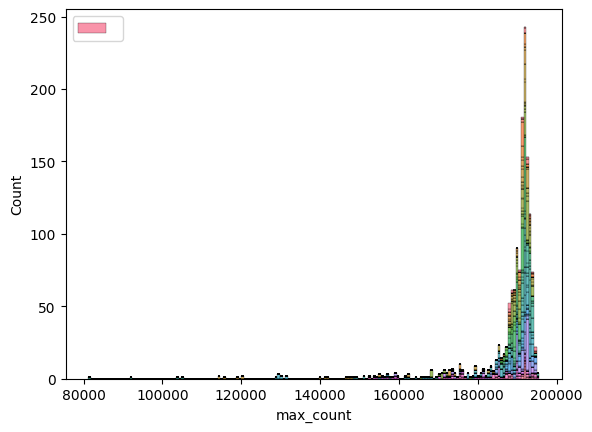

In [87]:
sns.histplot(estim_df, x='max_count', hue='dataset', multiple='stack')
plt.legend([''])

<Axes: xlabel='max_count', ylabel='Count'>

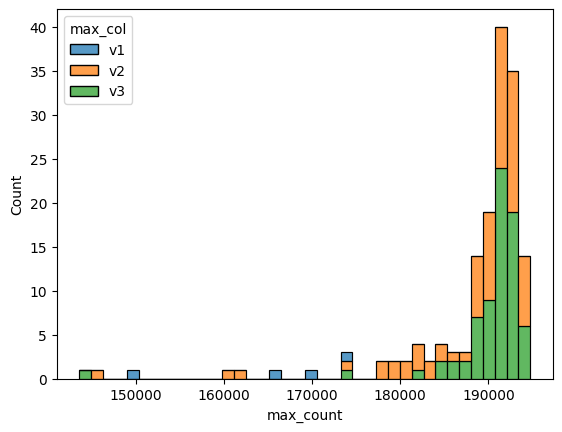

In [75]:
dataset_agg = data=estim_df.groupby('dataset', as_index=False).agg({'max_count': 'mean', 'max_col': 'max'})
sns.histplot(dataset_agg, x='max_count', hue='max_col', multiple='stack', hue_order=hue_order)

<Axes: xlabel='max_count', ylabel='Count'>

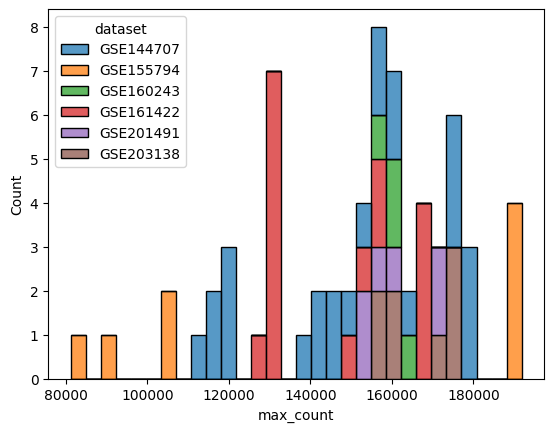

In [103]:
thr = 170000
small_count_datasets = dataset_agg[dataset_agg.max_count < thr].dataset.to_list()
sns.histplot(estim_df[estim_df.dataset.isin(small_count_datasets)], x='max_count', hue='dataset', bins=30, multiple='stack')

In [124]:
import os
import glob
basedir = 'reprocessing-datasets-project/0_Current'
dataset = 'GSE144707'
#glob.glob(f'./{basedir}/{dataset}/*solo_qc.tsv')

qc_df_list = list()
for dataset in small_count_datasets:
    path = f'./{basedir}/{dataset}/{dataset}.solo_qc.tsv'
    df = pd.read_csv(path, sep='\t')
    df['dataset'] = dataset
    qc_df_list.append(df)

qc_df = pd.concat(qc_df_list)
qc_df.head()

/lustre/scratch126/cellgen/cellgeni/tmp/ipykernel_3630947/1629581721.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  qc_df = pd.concat(qc_df_list)


,Sample,Rd_all,Rd_in_cells,Frc_in_cells,UMI_in_cells,Cells,Med_nFeature,Good_BC,WL,Species,Paired,Strand,all_u+m,all_u,exon_u+m,exon_u,full_u+m,full_u,dataset
0,GSM4712229,16365256,3853482,0.235,3692264,6207,378,0.530676,v2,Mouse,Single,Forward,0.431008,0.363071,0.325360,0.315193,0.375690,0.353111,GSE155794
1,GSM4712230,481908143,271042990,0.562,168648823,14774,3260,0.976741,v3,Mouse,Single,Forward,0.953956,0.811003,0.690190,0.672259,0.829317,0.786786,GSE155794
0,GSM4869646,139776259,69043028,0.494,6687355,2021,1235,0.806425,v2,Human,Single,Reverse,0.965390,0.693210,0.518849,0.506566,0.669586,0.536391,GSE160243
1,GSM4869647,154971965,89160681,0.575,38187562,7129,1581,0.847546,v2,Human,Single,Reverse,0.974957,0.792731,0.581473,0.570929,0.700923,0.608495,GSE160243
2,GSM4869648,138883181,78616908,0.566,8611605,1660,1799,0.832806,v2,Human,Single,Reverse,0.971436,0.770584,0.551999,0.542077,0.693780,0.589019,GSE160243


In [129]:
set(small_count_datasets).difference(qc_df.dataset.unique())

{'GSE144707', 'GSE203138'}

In [148]:
qc_df.to_csv('qc.tsv')

In [145]:
basedir = 'reprocessing-datasets-project/0_Current'
dataset = 'GSE144707'


statsolo_errors = list()
for dataset in small_count_datasets:
    log_path = glob.glob(f'./{basedir}/{dataset}/*.log')
    for path in log_path:
        with open(path, 'r') as file:
            logoutput = file.read()
            if ('Exited with exit code 1' in logoutput) and ('starsolo' in logoutput):
                statsolo_errors.append((dataset, path))
statsolo_errors

[('GSE144707',
  './reprocessing-datasets-project/0_Current/GSE144707/38530943.2.bsub.log'),
 ('GSE144707',
  './reprocessing-datasets-project/0_Current/GSE144707/38530943.1.bsub.log'),
 ('GSE144707',
  './reprocessing-datasets-project/0_Current/GSE144707/38530943.3.bsub.log'),
 ('GSE203138',
  './reprocessing-datasets-project/0_Current/GSE203138/38525714.1.bsub.log'),
 ('GSE203138',
  './reprocessing-datasets-project/0_Current/GSE203138/38525714.2.bsub.log')]

In [147]:
starsolo_errors_log = list()
for dataset, path in statsolo_errors:
    with open(path.replace('log', 'err')) as file:
        print(f'Starsolo ERROR for dataset={dataset}:')
        print(file.read())

Starsolo ERROR for dataset=GSE144707:
ERROR: Read 1 (barcode) is less than 24 bp in length. Please check the fastq files.

Starsolo ERROR for dataset=GSE144707:
ERROR: Read 1 (barcode) is less than 24 bp in length. Please check the fastq files.

Starsolo ERROR for dataset=GSE144707:
ERROR: Read 1 (barcode) is less than 24 bp in length. Please check the fastq files.

Starsolo ERROR for dataset=GSE203138:
ERROR: Read 1 (barcode) is less than 24 bp in length. Please check the fastq files.

Starsolo ERROR for dataset=GSE203138:
ERROR: Read 1 (barcode) is less than 24 bp in length. Please check the fastq files.



In [84]:
threash = 170000
def less_than_treash_prop(col):
    num = (col < threash).sum()
    return num / col.shape[0]

dataset_agg.groupby('max_col').agg({'max_count': less_than_treash_prop})

whitelist,max_count
max_col,
v1,0.500000
v2,0.039474
v3,0.013514


In [80]:
(dataset_agg.max_count < 170000).sum() / dataset_agg.shape[0]

np.float64(0.03896103896103896)